<a href="https://colab.research.google.com/github/Shrusti23/EE258_neural-networks/blob/master/VGGNet_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import MNIST.DataClean as dc
import numpy as np
import keras.layers.core as core
import keras.layers.convolutional as conv
import keras.models as models
import keras.callbacks as callbacks
import keras.utils.np_utils as kutils
import pandas as pd

In [0]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import numpy as np
import pandas as pd

In [0]:
batch_size = 128 # 128
epochs = 20 # 12
img_rows, img_cols = 28, 28

nb_filters_1 = 64
nb_filters_2 = 128
nb_filters_3 = 256
nb_conv = 3


In [0]:
# Adding column names for dataframes
colnames = ['label']
for i in range(1, 785):
  colnames += ['pixel'+str(i)]

from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_train.csv', names = colnames, header=None)
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mnist_test.csv', names = colnames, header=None)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
 #TRAINING

# drop training label
labels = train['label'].values
train.drop('label', axis=1, inplace=True)
# reshape
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

label_binarizer = LabelBinarizer() # to convert numerical variables to categorical variables for multi-class classification
labels = label_binarizer.fit_transform(labels)

# splitting
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=101)

# input image dimensions
input_shape = (28,28,1)

# normalizing training and test data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

z_train = kutils.to_categorical(x_train[:, 0])
nb_classes = z_train.shape[1]


In [0]:
nb_classes

28

In [0]:
cnn = models.Sequential()

cnn.add(conv.ZeroPadding2D((1,1), input_shape=(28, 28,1),))
cnn.add(conv.Convolution2D(nb_filters_1, nb_conv, nb_conv,  activation="relu"))
cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_1, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.MaxPooling2D(strides=(2,2)))

cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_2, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_2, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.MaxPooling2D(strides=(2,2)))

cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.ZeroPadding2D((1, 1)))
cnn.add(conv.Convolution2D(nb_filters_3, nb_conv, nb_conv, activation="relu"))
cnn.add(conv.MaxPooling2D(strides=(2,2)))

cnn.add(core.Flatten())
cnn.add(core.Dropout(0.2))
cnn.add(core.Dense(1024, activation="relu"))
cnn.add(core.Dense(10, activation="softmax"))

cnn.summary()
cnn.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

#cnn.load_weights("VGG_Temp.h5")
#print("Model loaded.")

hist= cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test)) #validation_split=0.01,
        #callbacks=[callbacks.ModelCheckpoint("VGG_Best.h5", save_best_only=True)]

yPred = cnn.predict_classes(x_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_51 (ZeroPaddi (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
zero_padding2d_52 (ZeroPaddi (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
zero_padding2d_53 (ZeroPaddi (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 128)      

In [0]:
score = cnn.evaluate(x_test, y_test, verbose=0)

print("Accuracy on test set: ",score[1])

Accuracy on test set:  0.992388904094696


In [0]:
yPred

array([7, 4, 9, ..., 5, 9, 9])

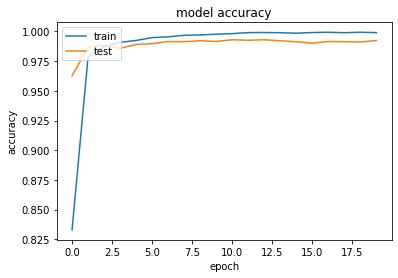

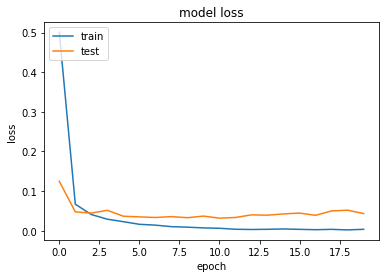

In [0]:
    import matplotlib.pyplot as plt
    plt.plot(hist.history['accuracy']) 
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy') 
    plt.ylabel('accuracy') 
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [0]:
! pip install virtualenv

!pip install --upgrade wandb

import wandb

wandb.init(sync_tensorboard=True)

Requirement already up-to-date: wandb in /usr/local/lib/python3.6/dist-packages (0.8.32)


W&B Run: https://app.wandb.ai/shrusti/uncategorized/runs/2j7ipuvs